In [1]:
# for array computations and laoding data
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for data visualization
import matplotlib.pyplot as plt

# for building and training neural networks
import tensorflow as tf

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# supress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


2025-04-14 17:43:16.092593: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 17:43:16.121769: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 17:43:16.580021: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Regression

I will build a model for a regression problem. Tha dataset contains 50 examples of an input feature `X` and its corresponding target `y`.

In [2]:
# load the data
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

# split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]

# convert 1-D arrays into 2-D because the commands later will requiere it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

#np. expand dims: Expand the shape of the array.
# Insert a new axis that will appear at the axis position in the expanded array shape

print(f" The shape of the inputs x is : {x.shape}")
print(f" The shape of the inputs y is : {y.shape}")

 The shape of the inputs x is : (50, 1)
 The shape of the inputs y is : (50, 1)


# Visualization

In [3]:
def plot_data(x,y, title):
    plt.rcParams["figure.figsize"] = (12,8)
    plt.rcParams["lines.markersize"] = 12
    plt.scatter(x,y, marker='x', c='r')
    plt.title(title)
    plt.xlabel("x");
    plt.ylabel("y");
    plt.show()

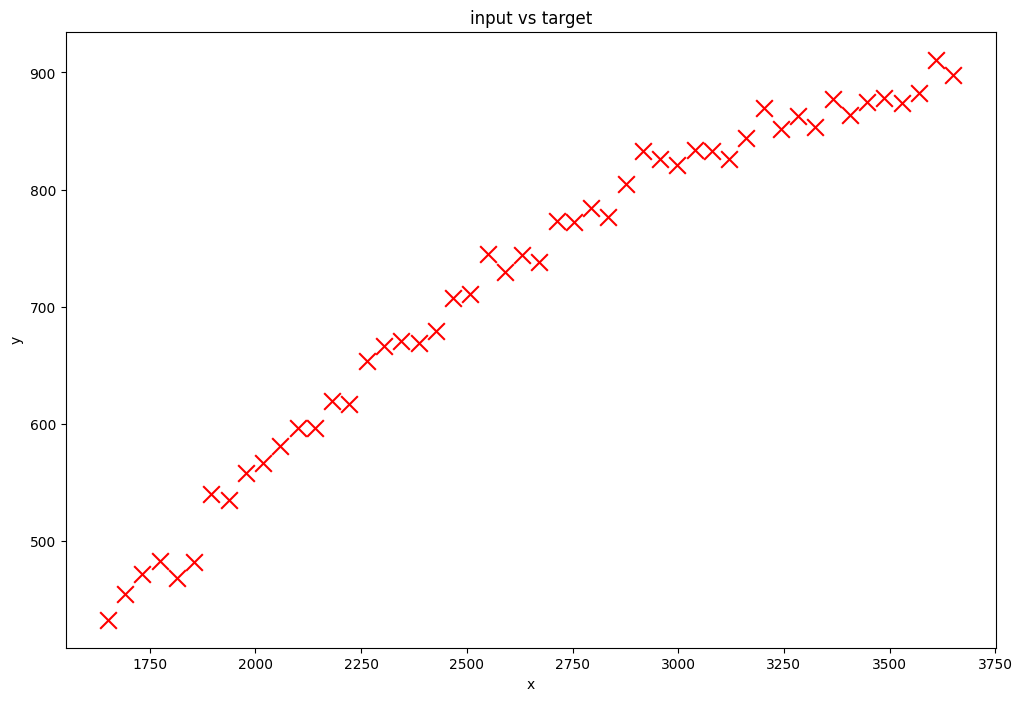

In [4]:
plot_data(x=x,y=y, title="input vs target")

# Split the data (Training, Cross-Validation, Test)

In [5]:
# Get 60 % of the dataset as the training set. Put the remaining 40% in temporary variables x_, y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"The shape of the training set (input) is: {x_train.shape}")
print(f"The shape of the training set (target) is: {y_train.shape}\n")
print(f"The shape of the cross validation set (input) is: {x_cv.shape}")
print(f"The shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"The shape of the test set (input) is: {x_test.shape}")
print(f"The shape of the test set (target) is: {y_test.shape}")



The shape of the training set (input) is: (30, 1)
The shape of the training set (target) is: (30, 1)

The shape of the cross validation set (input) is: (10, 1)
The shape of the cross validation set (target) is: (10, 1)

The shape of the test set (input) is: (10, 1)
The shape of the test set (target) is: (10, 1)


### Visualizing how the data was selected

In [30]:
def plot_data_explicit(x_train, y_train, x_cv, y_cv, x_test, y_test, title):
    plt.rcParams["figure.figsize"] = (12,8)
    plt.rcParams["lines.markersize"] = 12
    plt.scatter(x_train, y_train, marker='X', c='g', label='train')
    plt.scatter(x_cv, y_cv, marker='o', c='b', label='cv')
    plt.scatter(x_test, y_test, marker='v', c='m', label='test')
    plt.title(title)
    plt.xlabel("x");
    plt.ylabel("y");
    plt.legend(loc='upper left')
    plt.show()


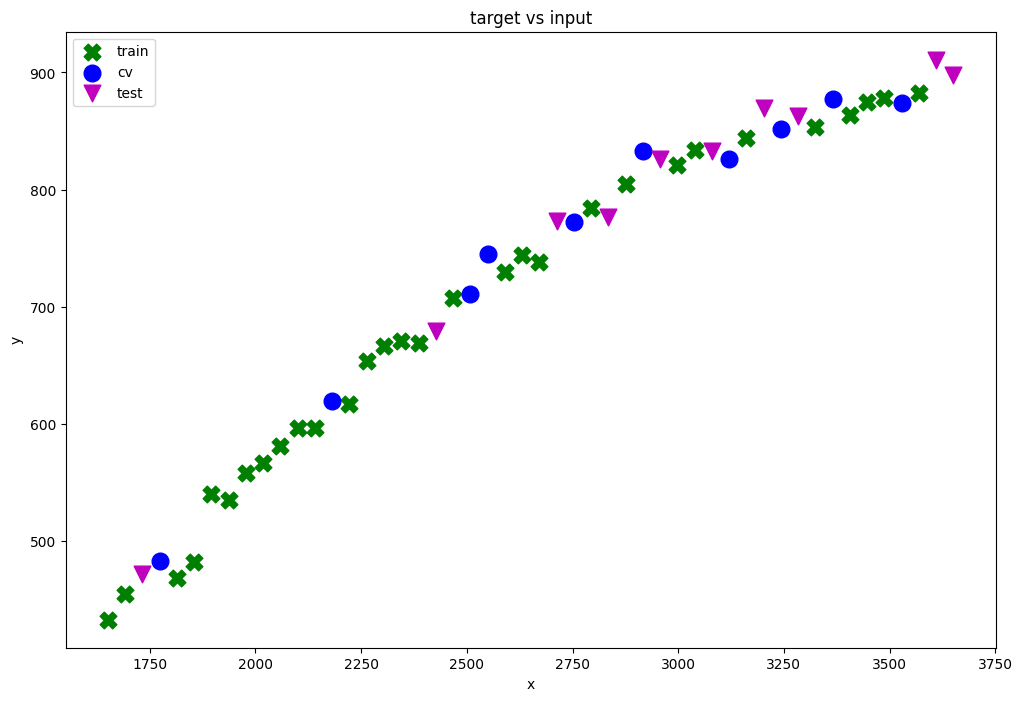

In [31]:
plot_data_explicit(x_train, y_train, x_cv, y_cv, x_test, y_test, title="target vs input")

# Fit a linear model

## Feature Scaling

`StandardScaler` class from scikit-learn computes a z-score:

$$z = \frac{z - \mu}{\sigma}$$

With this class, I will scaling the inputs